<a href="https://colab.research.google.com/github/insanudin16/NLP_Task/blob/main/Translation_Ciacia_to_Indonesia_LSTM(encoder_decoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bahasa Cia-Cia**

**Merupakan bahasa mayoritas masyarakat kabupaten Buton Selatan, Sulawesi Tenggara di beberapa kecamatan seperti Sampolawa, Lapandewa, Batauga, dan Batuatas. Serta beberapa wilayah di kota Bau-bau, kabupaten Buton, dan Kabupaten Wakatobi.**

**Bahasa Cia-cia merupakan bahasa daerah yang diwarisi secara turun temurun melalui lisan tanpa aksara khusus. Namun, dibeberapa tahun belakangan ini atau sekitar tahun 2009 pemerintah kota Bau-bau bekerja sama dengan Korea Selatan untuk menjadikan aksara 'hangeul' sebagai aksara untuk bahasa Cia-cia.**

**Pada tugas ini saya menggunakan huruf latin dengan pengucapan biasa yang saya gunakan dalam keseharian jika berbahasa Cia-cia, karena saya sebagai salah satu penutur bahasa Cia-cia. Tetapi, masih banyak keterbatasan bahasa yang rumit yang saya belum ketahui. Maka saya membuat project ini dari data atau bahasa yang saya ketahui saja**.

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Dataset
dataset = [
    ("<start> indau maa isa <end>", "<start> saya makan ikan <end>"),
    ("<start> ndau maa kenta <end>", "<start> saya makan ikan <end>"),
    ("<start> inte monoko aso <end>", "<start> pergi tidur <end>"),
    ("<start> poolim maa soo <end>", "<start> Apakah kamu sudah makan <end>"),
    ("<start> isoo mia impae <end>", "<start> kamu orang mana <end>"),
    ("<start> mai kaina <end>", "<start> mari disini <end>"),
    ("<start> inte longe <end>", "<start> pergi sana <end>"),
    ("<start> yau pogolu <end>", "<start> saya bermain bola <end>"),
    ("<start> ndau pogolu <end>", "<start> saya bermain bola <end>"),
    ("<start> mbompae lelemu <end>", "<start> bagaimana kabarmu <end>"),
    ("<start> mbompae lelemu <end>", "<start> bagaimana kabarmu <end>"),
    ("<start> mokesa hake mowine incu <end>", "<start> cantik sekali wanita itu <end>"),
    ("<start> bajinga uka mowine incu <end>", "<start> cantik juga wanita itu <end>"),
    ("<start> modaki ajono <end>", "<start> jelek wajahnya <end>"),
    ("<start> modaki sinaano <end>", "<start> jelek sifatnya <end>"),
    ("<start> mohane mokesa <end>", "<start> laki-laki tampan <end>"),
    ("<start> lingkaa wite <end>", "<start> jalan-jalan terus <end>"),
    ("<start> kaana toowa hake <end>", "<start> rumah besar sekali <end>"),
    ("<start> kaana toowa <end>",  "<start> rumah besar <end>"),
    ("<start> kaana kikidi <end>", "<start> rumah kecil sekali <end>"),
    ("<start> banua kikidi hake <end>", "<start> rumah kecil sekali <end>"),
    ("<start> banua tangku lala <end>", "<start> rumah dekat jalan <end>"),
    ("<start> mbilai hake <end>", "<start> jauh sekali <end>"),
    ("<start> tangku hake <end>", "<start> dekat sekali <end>"),
    ("<start> kowono hake <end>", "<start> bau sekali <end>"),
    ("<start> maa manu mei isa <end>", "<start> makan ayam dengan ikan <end>"),
    ("<start> manu kikidi matem <end>", "<start> ayam kecil mati <end>"),
    ("<start> impae cuhangka <end>", "<start> dimana kamu pergi <end>"),
    ("<start> impae cuminte <end>", "<start> dimana kamu pergi <end>"),
    ("<start> sampu itai <end>", "<start> turun di laut <end>"),
    ("<start> poandea mei mia agaano <end>", "<start> berteman dengan orang lain <end>"),
    ("<start> naipia kawiamu <end>", "<start> kapan pernikahanmu <end>"),
    ("<start> kawiau awulao <end>", "<start> pernikahanku satu bulan lagi <end>"),
    ("<start> asa asa inte kaanano sabangka <end>", "<start> sama sama pergi ke rumah teman <end>"),
    ("<start> holi bae <end>", "<start> beli beras <end>"),
    ("<start> kapaea cumbu wei wuta <end>", "<start> pepaya tumbuh di tanah <end>"),
    ("<start> poo mbaka hake <end>", "<start> mangga enak sekali <end>"),
    ("<start> hende oto parae isoo <end>", "<start> naik mobil apa kamu <end>"),
    ("<start> sami sawi motoro <end>", "<start> kita naik motor <end>"),
    ("<start> hende wei wawo <end>", "<start> naik di atas <end>"),
    ("<start> pangulu kake soana <end>", "<start> duluan kaki kanan <end>"),
    ("<start> pangulu kake sombali <end>", "<start> dulua kaki kiri <end>"),
    ("<start> limau molala <end>", "<start> tanganku sakit <end>"),
    ("<start> pocuu moboa <end>", "<start> kepalaku berat <end>"),
    ("<start> mina impae <end>", "<start> dari mana <end>"),
    ("<start> ngoo mohaito <end>", "<start> hidung gatal <end>"),
    ("<start> wuu mohaito <end>", "<start> rambut gatal <end>"),
    ("<start> isoo mosega <end>", "<start> kamu jahat <end>"),
    ("<start> bembe mopute pibanaka wei kailonge <end>","<start> kambing puting buang air di sana <end>"),
    ("<start> umbe uka <end>", "<start> iya juga <end>"),
    ("<start> molengo uka <end>", "<start> lama juga <end>"),
    ("<start> hone mokito <end>", "<start> pasir hitam <end>"),
    ("<start> hone mopute <end>", "<start> pasir putih <end>"),
    ("<start> ungkaka kapatuli <end>", "<start> anak nakal <end>"),
    ("<start> ungkaka umela <end>", "<start> anak baik <end>"),
    ("<start> hato mopute <end>", "<start> atap putih <end>"),
    ("<start> hato modakimo <end>", "<start> atap sudah rusak <end>"),
    ("<start> kowalaa nabita <end>", "<start> pagi besok <end>"),
    ("<start> nabita kowalaa <end>", "<start> besok pagi <end>"),
    ("<start> maa kaina <end>", "<start> makan disini <end>"),
    ("<start> modom kaina <end>", "<start> tidurlah disini <end>"),
    ("<start> modo kaina <end>", "<start> tidur disini <end>"),
    ("<start> maapa pagara ia <end>", "<start> mengapa marah dia <end>"),
    ("<start> ia cia sumala <end>", "<start> dia tidak salah <end>"),
    ("<start> waleula sumampuno wei dunia <end>", "<start> bidadari yang turun ke dunia <end>"),
    ("<start> ndee lumalono longe <end>", "<start> siapa yang lewat sana <end>"),
    ("<start> isoo incu mosega <end>", "<start> kamu itu jahat <end>"),
    ("<start> ina pitoro bae <end>", "<start> ibu memasak nasi <end>"),
    ("<start> inau maa sayoro mei kacampuru isa <end>", "<start> ibuku makan sayur dengan campuran ikan <end>"),
    ("<start> campuru bawa mopute mei modea <end>", "<start> campur bawang putih dan merah <end>"),
    ("<start> ndau bale wei kaana <end>", "<start> saya pulang ke rumah <end>"),
    ("<start> pingkanaaso wei lala <end>", "<start> hati hati di jalan <end>"),
    ("<start> pingkanaaso kailonge <end>", "<start> hati hati di sana <end>"),
    ("<start> kaina cia maapa <end>", "<start> di sini tidak apa apa <end>"),
    ("<start> maapa isoo mboincu <end>", "<start> mengapa kamu begitu <end>"),
    ("<start> indau polai minaaso kaana <end>", "<start> saya kabur dari rumah <end>"),
    ("<start> koie tode tode <end>", "<start> jangan lari lari <end>"),
    ("<start> polaimo agori <end>","<start> kaburlah cepat <end>"),
    ("<start> ndau pikampadari pitoro isa <end>", "<start> saya belajar memasak ikan <end>"),
    ("<start> simiu pikampadari sepa golu <end>", "<start> kalian belajar tendang bola <end>"),
    ("<start> golu toowa mopute <end>", "<start> bola besar berwarna putih <end>"),
    ("<start> koie pingkora kaincu <end>", "<start> jangan duduk di situ <end>"),
    ("<start> hawai pingkora kaina <end>", "<start> tapi duduk di sini <end>"),
    ("<start> maapa buaso <end>", "<start> memangnya kenapa <end>"),
    ("<start> bangu agori <end>", "<start> bangun cepat <end>"),
    ("<start> bangu ngkitapo banua <end>", "<start> dirikan kita rumah <end>"),
    ("<start> pohende wei wawo <end>", "<start> naikkan ke atas <end>"),
    ("<start> posampu wei woru <end>", "<start> turunkan ke bawah <end>"),
    ("<start> hende wei kaana <end>", "<start> naik ke rumah <end>"),
    ("<start> ato kamaa kailonge <end>", "<start> antar makanan ke sana <end>"),
    ("<start> minaaso kaina pada kailong <end>", "<start> dari sini sampai ke sana <end>"),
    ("<start> mbule siepo salano andeam <end>", "<start> pulangkan celananya temanmu <end>"),
    ("<start> naipia cu inte <end>", "<start> kapan kamu pergi <end>"),
    ("<start> mai to mblue aso <end>", "<start> mari kita pulang <end>"),
    ("<start> ndau peelu sayoro <end>", "<start> saya suka sayur <end>"),
    ("<start> uagkaka pogolu wei lapanga <end>", "<start> anak anak bermain bola di lapangan <end>"),
    ("<start> koie mboincu <end>", "<start> jangan seperti itu <end>"),
    ("<start> ndau cia peelu maa manu <end>", "<start> saya tidak suka makan ayam <end>"),
    ("<start> bembe incu mbaka hake <end>", "<start> kambing itu enak sekali <end>"),
    ("<start> moapa isoo mboincu <end>", "<start> mengapa kamu seperti itu <end>"),
    ("<start> moapa isoo mboina <end>", "<start> mengapa kamu seperti ini <end>"),
    ("<start> mboina wite <end>", "<start> seperti ini saja <end>"),
    ("<start> mboincu wite <end>", "<start> seperti itu saja <end>"),
    ("<start> kaana miu mongada <end>", "<start> rumah kalian bagus <end>"),
    ("<start> kaana miu impae <end>", "<start> rumah kalian dimana <end>")
]

## Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_data(dataset, max_words=1000):
    # Pisahkan source dan target
    source_texts = [pair[0] for pair in dataset]
    target_texts = [pair[1] for pair in dataset]

    # Buat dan fit tokenizer
    source_tokenizer = Tokenizer(num_words=max_words, filters='')
    target_tokenizer = Tokenizer(num_words=max_words, filters='')

    source_tokenizer.fit_on_texts(source_texts)
    target_tokenizer.fit_on_texts(target_texts)

    # Convert ke sequences
    source_sequences = source_tokenizer.texts_to_sequences(source_texts)
    target_sequences = target_tokenizer.texts_to_sequences(target_texts)

    # Padding
    max_source_length = max(len(seq) for seq in source_sequences)
    max_target_length = max(len(seq) for seq in target_sequences)

    source_padded = pad_sequences(source_sequences, maxlen=max_source_length, padding='post')
    target_padded = pad_sequences(target_sequences, maxlen=max_target_length, padding='post')

    return (source_padded, target_padded,
            source_tokenizer, target_tokenizer,
            max_source_length, max_target_length)

# Encoder-Decoder

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding

def create_simple_model(source_vocab_size, target_vocab_size, max_length):
    # Hyperparameters
    embedding_dim = 64
    lstm_units = 64

    # Encoder
    encoder_inputs = Input(shape=(None,))
    encoder_embedding = Embedding(source_vocab_size, embedding_dim)(encoder_inputs)
    encoder = LSTM(lstm_units, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_embedding = Embedding(target_vocab_size, embedding_dim)
    decoder_lstm = LSTM(lstm_units, return_sequences=True)
    decoder_dense = Dense(target_vocab_size, activation='softmax')

    decoder_embedded = decoder_embedding(decoder_inputs)
    decoder_outputs = decoder_lstm(decoder_embedded, initial_state=encoder_states)
    decoder_outputs = decoder_dense(decoder_outputs)

    # Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train Model

In [ ]:
import numpy as np

def train_model(dataset, epochs=100, batch_size=32):
    # Preprocess data
    source_padded, target_padded, source_tokenizer, target_tokenizer, max_source_length, max_target_length = preprocess_data(dataset)

    # Create model
    model = create_simple_model(
        len(source_tokenizer.word_index) + 1,
        len(target_tokenizer.word_index) + 1,
        max(max_source_length, max_target_length)
    )

    # Prepare target data
    decoder_target_data = target_padded[:, 1:]  # Target sequence shifted by one
    decoder_input_data = target_padded[:, :-1]  # Input sequence without the last token

    # Train model and save history
    history = model.fit(
        [source_padded, decoder_input_data],
        np.expand_dims(decoder_target_data, -1),  # Add channel dimension for sparse_categorical_crossentropy
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2
    )

    return model, source_tokenizer, target_tokenizer, max_source_length, history

# Visualisasi

In [ ]:
import matplotlib.pyplot as plt

def evaluate_and_visualize(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot (if available)
    if 'accuracy' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Fungsi Translation

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def translate_text(text, source_tokenizer, target_tokenizer, model, max_length):
    # Tokenisasi input
    sequence = source_tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Prediksi
    target_seq = np.zeros((1, max_length))
    target_seq[0, 0] = target_tokenizer.word_index['<start>']

    output_sentence = []

    for i in range(max_length):
        predictions = model.predict([padded, target_seq], verbose=0)
        predicted_id = np.argmax(predictions[0, i, :])

        if predicted_id == 0 or target_tokenizer.index_word.get(predicted_id) == '<end>':
            break

        output_sentence.append(target_tokenizer.index_word.get(predicted_id, ''))

        if i < max_length - 1:
            target_seq[0, i + 1] = predicted_id

    return ' '.join(output_sentence)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 445ms/step - accuracy: 0.1045 - loss: 5.0458 - val_accuracy: 0.3605 - val_loss: 5.0247
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4381 - loss: 5.0103 - val_accuracy: 0.3605 - val_loss: 4.9889
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4375 - loss: 4.9587 - val_accuracy: 0.3605 - val_loss: 4.9293
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4370 - loss: 4.8714 - val_accuracy: 0.3605 - val_loss: 4.8210
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4370 - loss: 4.7122 - val_accuracy: 0.3605 - val_loss: 4.6178
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4437 - loss: 4.4124 - val_accuracy: 0.3605 - val_loss: 4.2707
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4375 - loss: 3.9704 - val_accuracy: 0.3605 - val_loss: 3.8579
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4269 - loss: 3.5449 - val_accuracy: 0.3605 - val_los

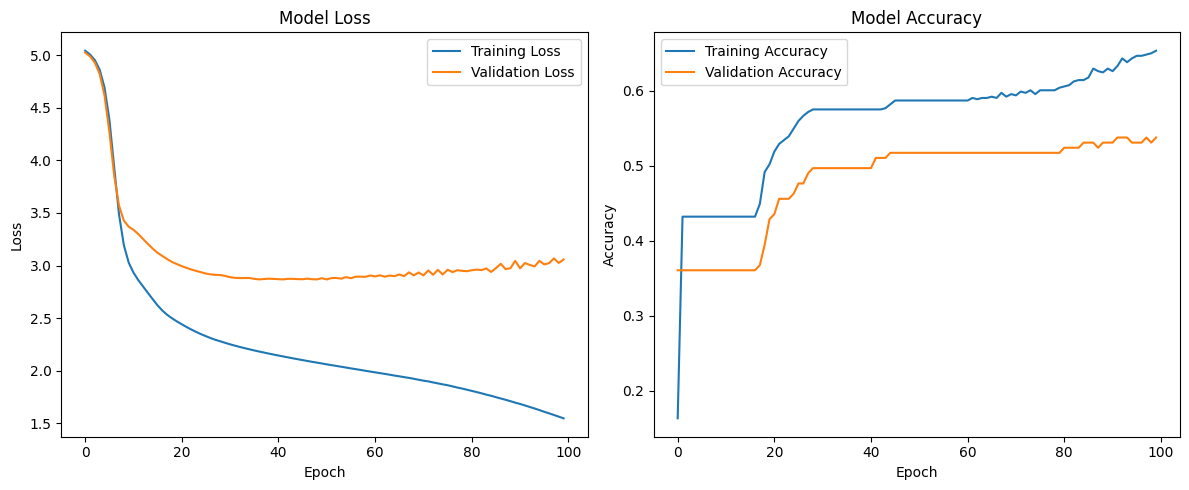

Input: <start> ndau maa isa <end>
Translation: saya makan


In [ ]:
if __name__ == "__main__":
    # Train model
    model, source_tokenizer, target_tokenizer, max_length, history = train_model(dataset)

    # Visualize metrics
    evaluate_and_visualize(history)

    # Test translation
    test_sentence = "<start> ndau maa isa <end>"
    translation = translate_text(
        test_sentence,
        source_tokenizer,
        target_tokenizer,
        model,
        max_length
    )
    print(f"Input: {test_sentence}")
    print(f"Translation: {translation}")

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.1206 - loss: 5.0460 - val_accuracy: 0.3605 - val_loss: 5.0163
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4345 - loss: 4.9967 - val_accuracy: 0.3605 - val_loss: 4.9658
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4319 - loss: 4.9241 - val_accuracy: 0.3605 - val_loss: 4.8781
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4258 - loss: 4.7976 - val_accuracy: 0.3605 - val_loss: 4.7136
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4364 - loss: 4.5488 - val_accuracy: 0.3605 - val_loss: 4.3969
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4314 - loss: 4.1094 - val_accuracy: 0.3605 - val_loss: 3.8934
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4386 - loss: 3.4936 - val_accuracy: 0.3605 - val_loss: 3.4684
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4414 - loss: 3.0658 - val_accuracy: 0.3605 - val_loss

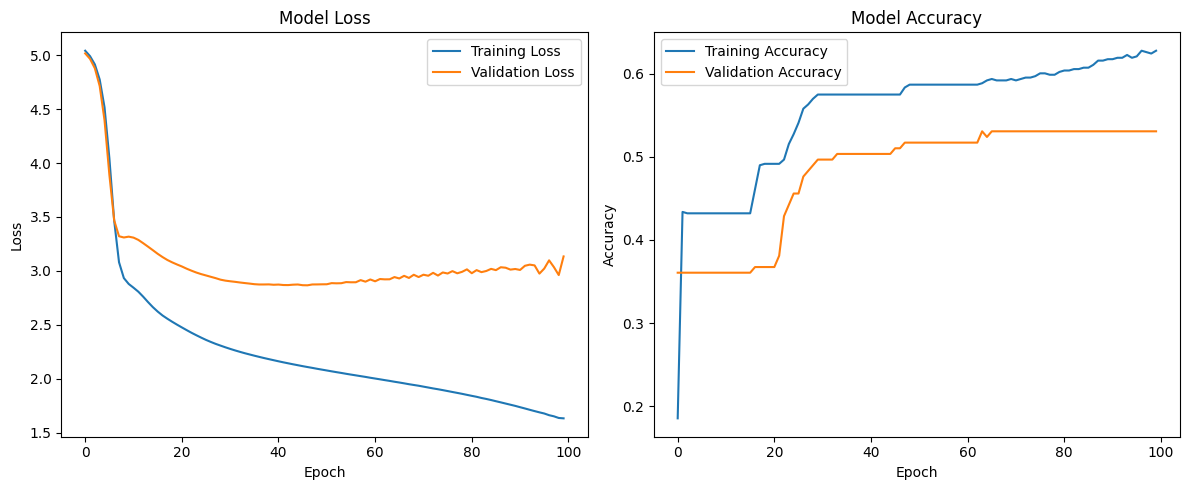

Input: <start> isoo inte wei kaana <end>
Translation: kamu kamu
Terjemahan yang diharapkan : kamu pergi ke rumah


In [ ]:
if __name__ == "__main__":
    # Train model
    model, source_tokenizer, target_tokenizer, max_length, history = train_model(dataset)

    # Visualize metrics
    evaluate_and_visualize(history)

    # Test translation
    test_sentence = "<start> isoo inte wei kaana <end>"
    translation = translate_text(
        test_sentence,
        source_tokenizer,
        target_tokenizer,
        model,
        max_length
    )
    print(f"Input: {test_sentence}")
    print(f"Translation: {translation}")
    print("Terjemahan yang diharapkan : kamu pergi ke rumah")